In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
import io

In [7]:
#downloading the image
url= "https://www.tatacliq.com/que/wp-content/uploads/2017/11/square-face.jpg"
image=Image.open(io.BytesIO(requests.get(url,stream=True).content)).convert("RGB")

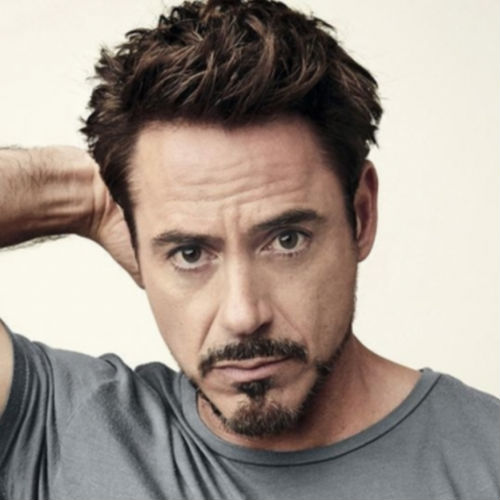

In [9]:
image

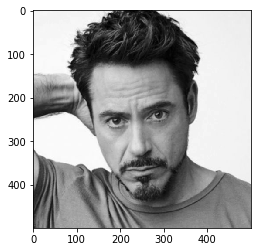

In [19]:
image_array=np.array(image)
gray = cv2.cvtColor(image_array,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

In [20]:
cv2.__path__

['F:\\anaconda\\lib\\site-packages\\cv2']

In [25]:
detector = cv2.CascadeClassifier("F:\\anaconda\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")

In [26]:
faces = detector.detectMultiScale(gray,1.3,5)

In [27]:
faces

array([[ 90, 130, 306, 306]], dtype=int32)

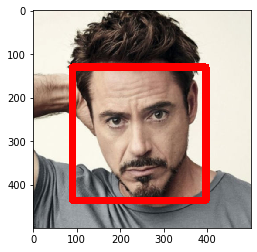

In [28]:
for  face in faces:
    x,y,w,h = face
    cv2.rectangle(image_array,(x,y),(x+w,y+h),(255,0,0),15)
plt.imshow(image_array)    

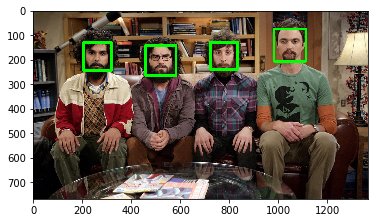

In [31]:
url= "https://miro.medium.com/max/2732/1*5XojINtKrkHFT3nOx6oW1g.jpeg"
image=Image.open(io.BytesIO(requests.get(url,stream=True).content)).convert("RGB")
image_array=np.array(image)
gray = cv2.cvtColor(image_array,cv2.COLOR_BGR2GRAY)
detector = cv2.CascadeClassifier("F:\\anaconda\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")
faces = detector.detectMultiScale(gray,1.3,5)
for  face in faces:
    x,y,w,h=face
    cv2.rectangle(image_array,(x,y),(x+w,y+h),(0,255,0),10)   #10 thickness of border
plt.imshow(image_array) 


In [1]:
import cv2
import numpy as np
import math

cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    detector = cv2.CascadeClassifier("F:\\anaconda\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")
    faces=detector.detectMultiScale(frame,1.3,5)

    if len(faces) > 0:
        for face in faces:
            x,y,w,h=face

            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),5)

    cv2.imshow("Input ",frame)

    c = cv2.waitKey(1)
    if c == 27:
        break
    

cap.release()
cv2.destroyAllWindows()